In [1]:
%matplotlib inline
from scipy import signal, ndimage
import numpy as np
import matplotlib.pyplot as plt
import time
from get_neuralynx import *
from pathlib import Path
import h5py
import seaborn as sns

/Users/alexgonzalez/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
animal = 'Li'
task = 'OF'
date = '062718'

filename = animal+'_'+task+'_'+date+'_Results'
datPath=Path('/Users/alexgonzalez/Google Drive/PostDoc/Data/',task,animal,filename)
savePath=Path(datPath,'plots')
savePath.mkdir(parents=True, exist_ok=True)

In [6]:
# Read t,x,y
with h5py.File((datPath / 'VT1.h5'), 'r') as f:
    t = f.get('t').value
    x = f.get('x').value
    y = f.get('y').value

/Users/alexgonzalez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/Users/alexgonzalez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/alexgonzalez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
/Users/alexgonzalez/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


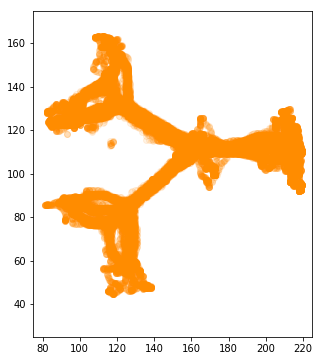

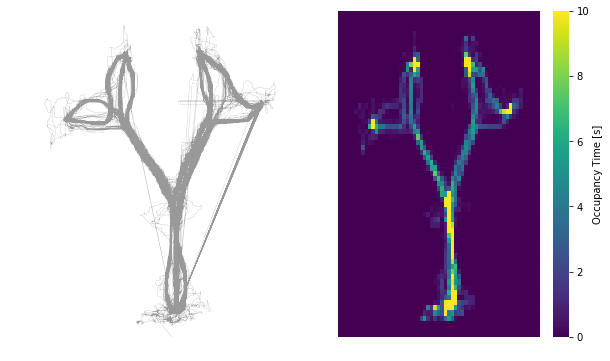

In [106]:
if not task=='OF':
    fig, ax = plt.subplots(figsize=(5,6))
    ax.scatter(x,y,color='darkorange',alpha=0.1)
    ax.set_ylim(25,175)
    ax.set_xlim(75,225)

    badIDs = np.logical_and(x>160, y<60)
    x[badIDs]=np.nan
    y[badIDs]=np.nan
    #rotate and center. For Maze only*
    x2=y-110
    x[badIDs]=np.nan
    x2=signal.medfilt(x2,11)

    y2=-x+225
    y2=signal.medfilt(y2,11)
    goodIDs = y2<150

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

    ax1.plot(x2[goodIDs],y2[goodIDs],color='grey',alpha=0.8, linewidth=0.2)
    ax1.set_ylim(0,150)
    ax1.axis('off')

    xed = np.arange(70,230,2.5)
    yed = np.arange(30,180,2.5)
    H,a,b=np.histogram2d(x,y,bins=(xed,yed))

    ax2=sns.heatmap(H/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=10,ax=ax2,
                   cbar_kws={'label': 'Occupancy Time [s]'})
    #saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'
    #fig.savefig(saveDir+ FolderName + 'MazeOccupancy.png',bbox_inches='tight',dpi = 500)



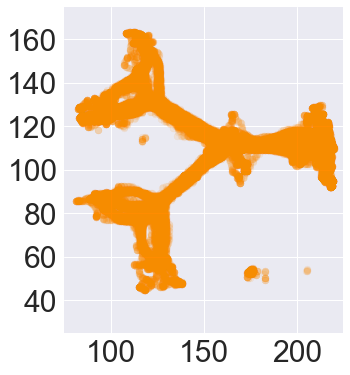

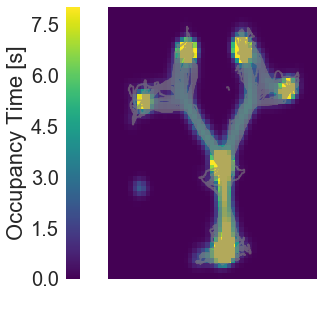

In [166]:
if not task=='OF':
    fig, ax = plt.subplots(figsize=(5,6))
    ax.scatter(x,y,color='darkorange',alpha=0.1)
    ax.set_ylim(25,175)
    ax.set_xlim(75,225)

    badIDs = np.logical_and(x>160, y<60)
    badIDs = np.logical_or(x<80, badIDs)
    r=np.append(0,np.sqrt(x**2+y**2))
    
    rd=np.diff(r)
    badIDs = np.logical_or(badIDs, abs(rd)>5)

    #rotate and center. For Maze only*
    x2=np.array(y)
    x2=signal.medfilt(x2,13)
    x2[badIDs]=np.nan


    y2=np.array(-x)
    y2=signal.medfilt(y2,13)
    y2[badIDs]=np.nan


    fig, ax1 = plt.subplots( figsize=(5,5))
    xed = np.arange(70,230,3)
    yed = np.arange(30,180,3)
    H,a,b=np.histogram2d(x,y,bins=(xed,yed))
    H2=ndimage.gaussian_filter(H,1)
    sns.set(font_scale=2)  # crazy big
    ax1=sns.heatmap(H2/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=8,ax=ax1,
                    cbar_kws={'label': 'Occupancy Time [s]','use_gridspec':False,'location':'left'})
    #dict(use_gridspec=False,location="top")
    #saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'
    #fig.savefig(saveDir+ FolderName + 'MazeOccupancy.png',bbox_inches='tight',dpi = 500)
    ax2 = fig.add_axes(ax1.get_position())
    ax2.patch.set_visible(False)
    #ax2.scatter(x2,y2,color='grey',marker='.',alpha=0.02,)
    ax2.plot(x2,y2,color='grey',alpha=0.6,)
    ax2.set_xlim(30,176)
    ax2.set_ylim(-228,-70)
    ax2.axis('off')
    fig.savefig(str(savePath / 'TreeMazeOccupancy_overlay.png'),bbox_inches='tight',dpi = 500)



(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.30000e+01,
        5.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00,
        2.00000e+00, 4.00000e+00, 5.00000e+00, 4.19000e+02, 4.86160e+04,
        1.62511e+05, 8.10000e+02, 4.00000e+00, 4.00000e+00, 0.00000e+00,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00

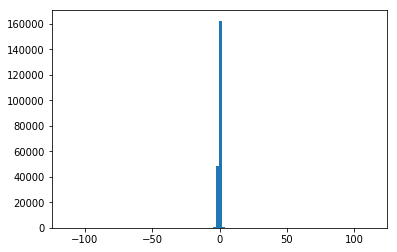

In [128]:
r=np.sqrt(x**2+y**2)

rd=(np.diff(r))
badIDs=abs(rd)>10
plt.hist(rd[~np.isnan(rd)],100)


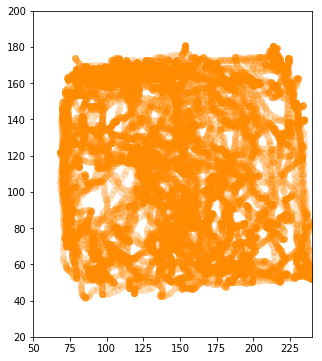

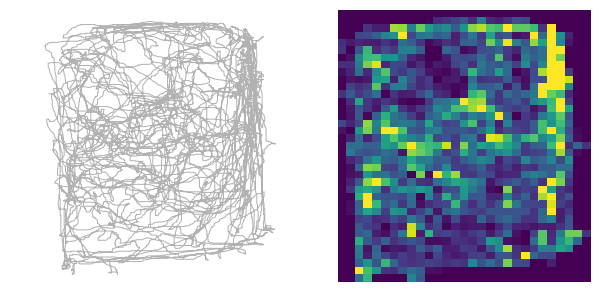

In [66]:
if task=='OF':
    fig, ax = plt.subplots(figsize=(5,6))
    ax.scatter(x,y,color='darkorange',alpha=0.1)
    ax.set_ylim(20,200)
    ax.set_xlim(50,240)

    #rotate and center. For Maze only*
    x2=y-110
    x2=signal.medfilt(x2,5)
    y2=-x+250
    y2=signal.medfilt(y2,5)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.plot(x2,y2,color='grey',alpha=0.6, linewidth=1)
    ax1.set_ylim(0,190)
    ax1.axis('off')

    xed = np.arange(60,250,5)
    yed = np.arange(40,190,5)
    H,a,b=np.histogram2d(x,y,bins=(xed,yed))

#     ax2=sns.heatmap(H/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=2,ax=ax2,
#                    cbar_kws={'label': 'Occupancy Time [s]'})
    ax2=sns.heatmap(H/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=2,ax=ax2,cbar=False)
    fig.savefig(str(savePath / 'MazeOccupancy_1.png'),bbox_inches='tight',dpi = 500)



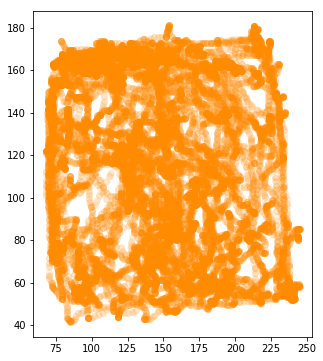

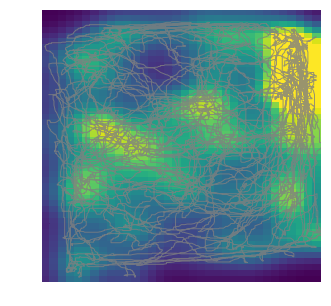

In [96]:
if task=='OF':
    fig, ax = plt.subplots(figsize=(5,6))
    ax.scatter(x,y,color='darkorange',alpha=0.1)

    #rotate and center. For Maze only*
    x2=y
    x2=signal.medfilt(x2,5)
    y2=-x
    y2=signal.medfilt(y2,5)

    fig, ax1 = plt.subplots(figsize=(5,5))
    xed = np.arange(60,250,4)
    yed = np.arange(40,180,4)
    H,a,b=np.histogram2d(x,y,bins=(xed,yed))

#     ax2=sns.heatmap(H/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=2,ax=ax2,
#                    cbar_kws={'label': 'Occupancy Time [s]'})
    H2=ndimage.gaussian_filter(H,2)
    ax1=sns.heatmap(H2/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=0.8,ax=ax1,cbar=False)
    #saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'
    #fig.savefig(saveDir+ FolderName + 'MazeOccupancy.png',bbox_inches='tight',dpi = 500)
    ax2 = fig.add_axes(ax1.get_position())
    ax2.patch.set_visible(False)
    ax2.plot(x2,y2,color='grey',alpha=0.8, linewidth=1)
    ax2.set_xlim(40,176)
    ax2.set_ylim(-248,-60)
    ax2.axis('off')
    fig.savefig(str(savePath / 'MazeOccupancy_2.png'),bbox_inches='tight',dpi = 500)


In [ ]:
if task=='OF':
    # create nept position module
    

In [29]:
p = nept.Position(np.array([x,y]).T,t)

In [33]:
p

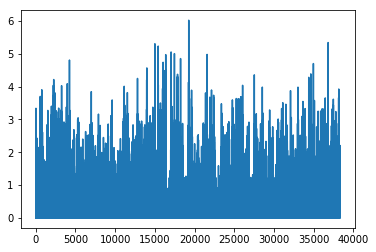

In [32]:
plt.plot(s.data)